This is a house Price detction

Made using Python and XGBoost Regression.

Types of Supervised Learning Model

1) Classification: Predicting a class or discrete values

2) Regression: It is about predicting a quantity or continuous values.

The dataset used in this project comes from the UCI machine learniung repository ->Boston House Price Dataset.
506 entries represent aggregate information about 14 features of homes from various suburbs located in Boston.

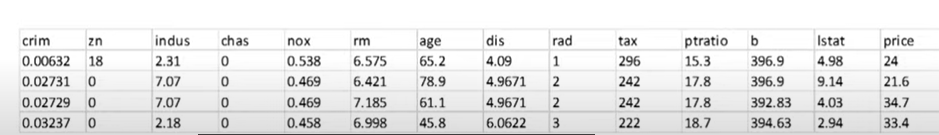



Workflow:

1) House Price Data
2) Data Pre-Processing
3) Data Analysis
4) Train-Test Split
5) Split data fed to XGBoost Regressor
6) Evaluation

Installing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from ucimlrepo import fetch_ucirepo 

Importing the Boston House price Dataset

In [6]:
real_estate_valuation = fetch_ucirepo(id=477)

In [7]:
#data( as pandas dataframe)
X= real_estate_valuation.data.features
Y= real_estate_valuation.data.targets

#metadata
print(real_estate_valuation.metadata)

#variable information
print(real_estate_valuation.variables)

{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [10]:
X.to_csv("data_features.csv")

In [11]:
Y.to_csv("data_targets.csv")

In [12]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [13]:
Y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [14]:
house_price_dataset = X

In [16]:
house_price_dataset["Y House Price per unit Area "] = Y[0:]

C:\Users\hp\AppData\Local\Temp\ipykernel_16164\2512530156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_dataset["Y House Price per unit Area "] = Y[0:]


In [17]:
house_price_dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y House Price per unit Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [18]:
house_price_dataset.to_csv("Housing_dataset.csv")

In [20]:
#check for missing values
house_price_dataset.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y House Price per unit Area               0
dtype: int64

In [21]:
#statistical measures of the dataset
house_price_dataset.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y House Price per unit Area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Understanding the correlation with the between features in the dataset

1. Positive Correlation

2. Negative Correlation

In [22]:
correlation =house_price_dataset.corr()

<Axes: >

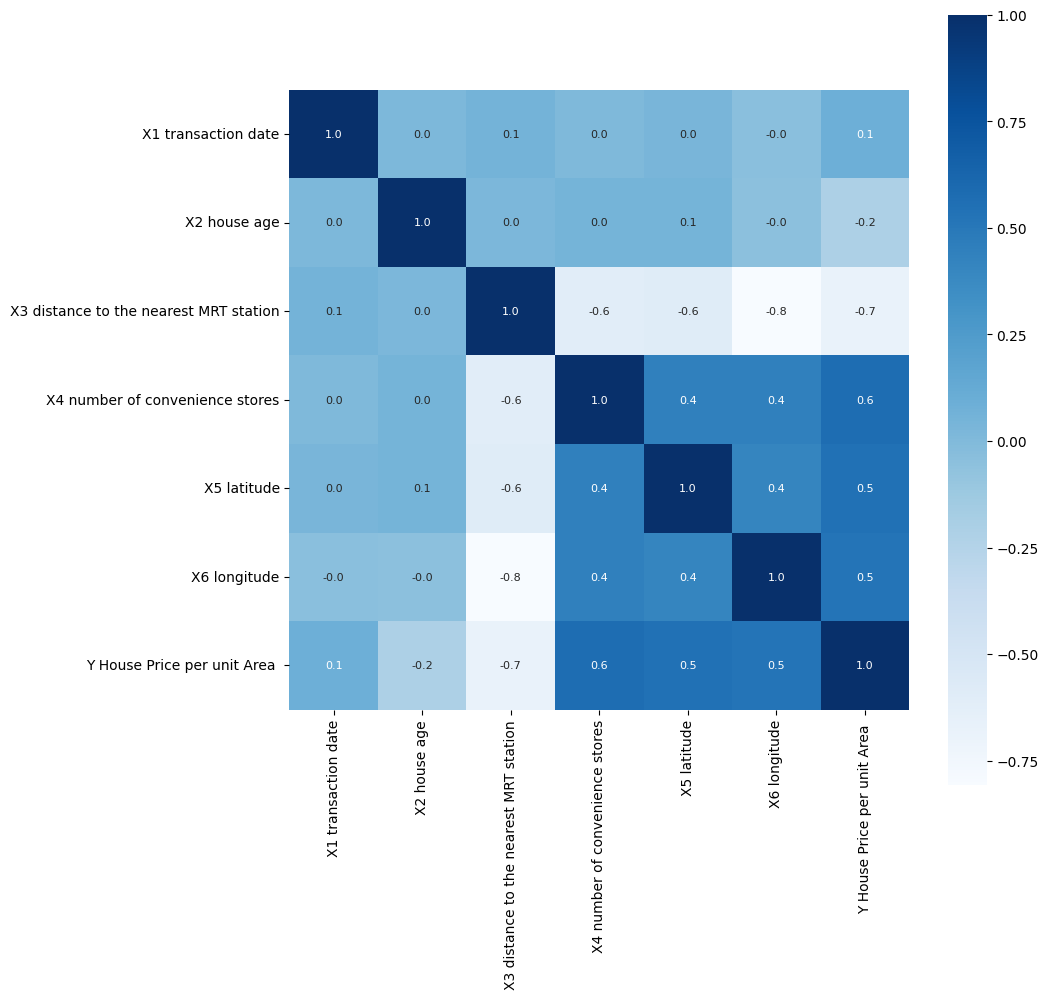

In [24]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Split test and training data

In [26]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,train_size=0.2,random_state=1)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(414, 7) (82, 7) (332, 7)


Model training

XGBoost Regressor Model

In [28]:
#Loading the model
model =XGBRegressor()

#Training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating our model

In [29]:
#we cant find accuracy score for the model obviously
#we find metrics like mean square error or Cost Function
#prediction on Training Data

#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [30]:
print(training_data_prediction)

[42.300182 54.400307 48.199425 37.29921  18.300222 29.700369 40.100475
 11.200031 23.698421 51.000065 46.79945  73.59969  17.701994 22.799992
 15.599401 31.102154 62.89978  34.599735 38.101444 29.300034 30.499537
 40.899334 25.597271 12.800466 27.001076 36.599796 25.300549 50.499577
 28.499222 28.400461 35.600414 52.998817 56.200058 36.7998   34.10089
 45.39971  54.80052  47.300606 13.199559 28.501406 22.099218 48.000065
 46.40003  55.300186 39.700874 40.600258 40.90031  42.002037 42.199436
 42.800182 24.602484 37.49894  26.90015  46.701763 28.898804 27.001461
 25.699413 41.39726  48.09992  36.199295 44.19724  18.299643 52.70026
 44.900097 51.80029  34.000084 36.69954  44.80018  38.600197 38.99972
 40.799828 41.00027  28.398558 36.500282 39.49773  46.100983 40.300434
 17.400454 36.30172  31.899347 39.299313 25.300497]


In [33]:
#R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ",score_1)
print("Mean squared error : ",score_2)

R squared error :  0.9999999930475726
Mean squared error :  0.0007114224317597223


Visualizing the actual prices and predicted prices

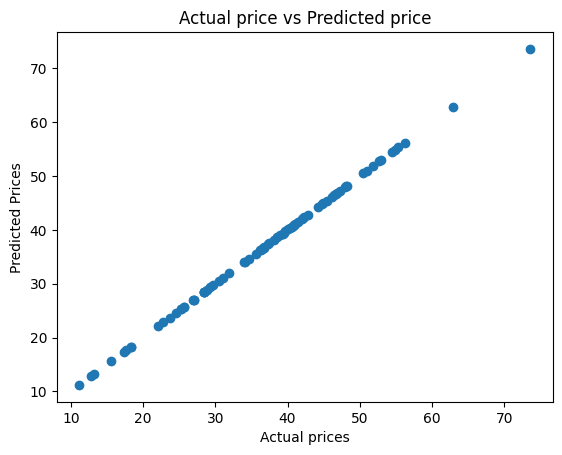

In [36]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted price")
plt.show()

Prediction on test data

In [34]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[27.011671 55.04339  17.971087 12.800386 45.436687 23.600544 18.343876
 31.784172 37.46499  22.037119 16.915203 36.636566 22.619747 36.633114
 55.877247 19.243746 42.732388 40.297436 26.884552 41.9062   46.101543
 17.75853  38.155735 52.84373  56.02671  25.343496 31.858868 60.05956
 42.811054 15.667858 31.73384  33.7763   39.418457 51.825184 46.679367
 12.80429  37.312645 31.766834 42.07346  18.007278 40.212524 15.329176
 60.033127 31.672783 29.786718 19.110695 19.063583 42.42829  38.2396
 39.243053 18.143839 43.874977 39.837517 13.251225 50.424282 36.44039
 51.817356 37.32174  26.06827  42.229637 11.422525 31.770077 29.865715
 18.119133 42.19196  32.017357 42.230904 42.296474 15.475127 42.76837
 43.737877 13.174365 29.572187 22.268728 47.91073  36.88956  29.90746
 36.649406 31.788504 60.04416  40.888382 51.828842 46.40491  37.43573
 51.83023  60.06337  48.152893 29.505304 47.677315 18.30609  26.9953
 67.02414  66.99534  25.621706 47.558994 42.268017 22.315498 40.25039
 66.988205 55.09

In [35]:
#R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

#mean squared error
score_4 = metrics.mean_squared_error(Y_test, test_data_prediction)

print("R2 squared error: ",score_3)
print("Mean square error: ",score_4)

R2 squared error:  0.9621354693265474
Mean square error:  7.374944453542664


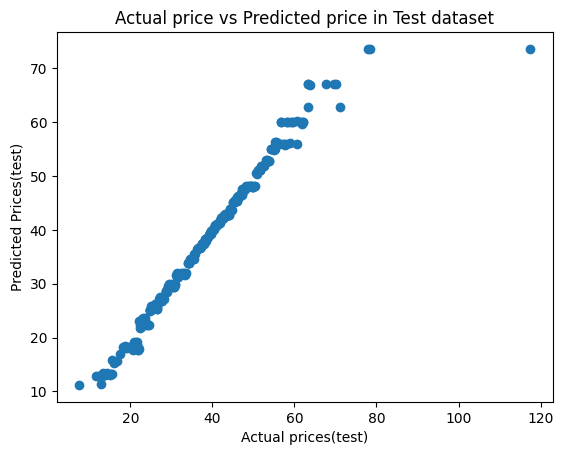

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices(test)")
plt.ylabel("Predicted Prices(test)")
plt.title("Actual price vs Predicted price in Test dataset")
plt.show()